In [2]:
import nltk
from nltk.corpus import PlaintextCorpusReader
import pandas as pd
import requests
import json

## **2.2 Introduction to NLTK**

In [3]:
df_characters = pd.read_csv("zelda-characters-complete.csv")

In [23]:
baseurl = "https://zelda.fandom.com/api.php?"
action = "action=query"
# title = "titles=Cherry"
content = "prop=extracts&exlimit=1&explaintext"
dataformat ="format=json"

In [4]:
# We hard code the aliases now that we know there is only a single redirect case
aliases = {
  "Cherry": "Ancient_Oven"
}

In [39]:
def download_wikitexts(df, folder_path):
  for name in df.Name:
    name = name.replace(" ", "_")
    if name in aliases:
      name = aliases[name]
    title = "titles=" + name
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    wikitext = requests.get(query).json()
    wikitext = list(wikitext["query"]["pages"].items())[0][1]["extract"]
    with open(f"{folder_path}/{name}.txt", "w") as f:
      json.dump(wikitext, f)


In [5]:
download_wikitexts(df_characters, "character-texts")

NameError: name 'download_wikitexts' is not defined

In [6]:
def formatFileNames(name):
  return  name.replace(" ", "_") + ".txt"

name_list = df_characters['Name'].tolist()
file_list = list(map(formatFileNames, name_list))

In [7]:
corpus_root = "character-texts"
wordlists = PlaintextCorpusReader(corpus_root, '.*')
zelda_text = nltk.Text(wordlists.words())

## **2.3 Exercises: NLPP Chapter 1**

**Try out the concordance method, using the ZeldaWiki text and a word of your own choosing.**

In [54]:
zelda_text.concordance("Attack")

Displaying 25 of 197 matches:
\ nIf Link saves Agus from an enemy attack , he might ask if Link is a famous 
er solution , saying that she would attack the man when he least suspects it .
ccasionally on roads where they may attack passing travelers . Black Bokoblins
Horses .\ nBlack Bokoblins share an attack pattern with other Bokoblin counter
the ground , Black Bokoblins mainly attack by swinging and slamming their held
 variant of the Ice Wizzrobe . They attack by using their Blizzard Rods to dis
ill stun them and give Link time to attack . Hitting it with a Fire attack , s
 to attack . Hitting it with a Fire attack , such as with a Fire Arrow or a Fl
r variants , but can also do a Jump Attack .\ nDuring the Horde Battle , the B
he final entrance can do a charging attack similar to Ghirahim in his first fi
ins in The Adventure of Link , they attack by throwing their spears or jabbing
e to scan their surroundings and to attack . Unarmed Bokoblins will combat Lin
ne arm .[ verification

**Also try out the similar and common_context methods, again with any word/s you like.**

In [55]:
zelda_text.similar("Attack")

link give tell him ask help see find sell take make her leave let have
them return use destroy protect


In [56]:
zelda_text.common_contexts(["Attack", "Help"])

to_him to_link to_them will_link would_the and_him s_she to_a will_him
to_zelda to_the to_her


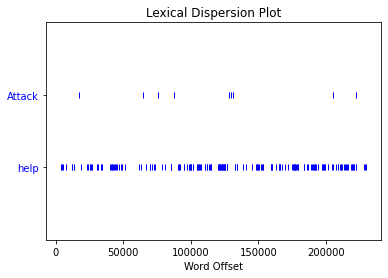

In [59]:
zelda_text.dispersion_plot(["Attack", "help"])

Help is used quite consistently throughout all the texts.

In [132]:
top_races = df_characters.loc[df_characters["Role"] == "Ally", ["Race"]].value_counts()[0:6]
top_races = [ x[0] for x in list(top_races.index.values)]

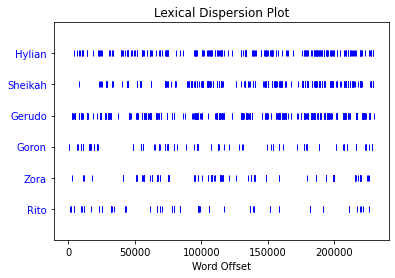

In [130]:
zelda_text.dispersion_plot(top_races)

The order of our texts is inherited from the order of allies in the wiki. Allies are grouped by location, which could imply that the areas in our corpus where a certain race occurs more frequent in the text correspond to an in game area that said race is native to.

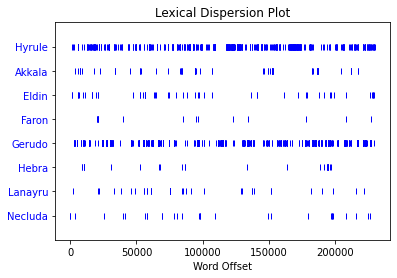

In [174]:
zelda_text.dispersion_plot(["Hyrule", "Akkala", "Eldin", "Faron", "Gerudo", "Hebra", "Lanayru", "Necluda"])

The aboce lexical dispersion plot looks at values of the locations afterwhich our text is sorted.

**What is a bigram? How does it relate to collocations. Explain in your own words.**

A bigram is a set of two adjacent elements from a string of tokens. In our case we are looking at bigrams of words. Collocations are frequent bigrams.

In [175]:
zelda_text.collocations()

References =="; Nomenclature ==\; Biography ==\; See Also; Divine
Beast; Also ==\; Gerudo Town; Ancient Shrine; Beast Vah; Calamity
Ganon; Side Quest; Link speaks; Gallery ==\; Sheikah Slate; Princess
Zelda; Hyrule Castle; Zelda series; Wind Waker; years prior; 000 years


In [180]:
b_words = sorted([w for w in zelda_text if w.startswith('b') ])
b_words[0:5]

['baby', 'baby', 'back', 'back', 'back']

In [181]:
zelda_text.index("Cherry")

3293

In [193]:
sentence = " ".join(zelda_text[3286:3303])
sentence

'The Ancient Oven , also known as Cherry , is a character in Breath of the Wild'

In [224]:
uppercase_words = list(reversed(sorted([word for word in zelda_text if word.isupper()], key=lambda x: len(x))))
for word in uppercase_words[:5]:
  print(word)

CRAAAAACK
BZZBZZT
BOOOOOM
BZZBZZ
3000HP


In [228]:
print(f"Number of tokens: {len(zelda_text)}")
print(f"Number of distint tokens: {len(set(zelda_text))}")

Number of tokens: 229894
Number of distint tokens: 11566


Lexical Diversity is a measure of how many distint word types (or types) there are in a given text, relative to the total number of tokens. If every token in a text is unique the text has a lexical diversity of 1.

In [230]:
def lexical_diversity(text):
  return len(set(text)) / len(text)

In [231]:
lexical_diversity(zelda_text)

0.05031014293543981

In [237]:
df_allies = df_characters.loc[df_characters["Role"] == "Ally"]
df_enemies_bosses = df_characters.loc[df_characters["Role"].isin(["Enemy", "Boss"])]

,Name,Role,Race,Gender
571,Black Bokoblin,Enemy,Bokoblin,Unknown
572,Black Lizalfos,Enemy,Lizalfos,Unknown
573,Black Moblin,Enemy,Moblin,Unknown
574,Blizzrobe,Enemy,Wizzrobe,Unknown
575,Blue Bokoblin,Enemy,Bokoblin,Unknown
...,...,...,...,...
651,Waterblight Ganon,Boss,Unknown,Unknown
652,Master Kohga,Boss,Sheikah,Male
653,Monk Maz Koshia,Boss,Sheikah,Male
654,Calamity Ganon,Boss,Gerudo,Male


In [238]:
def download_wikitexts(df, folder_path):
  for name in df.Name:
    name = name.replace(" ", "_")
    if name in aliases:
      name = aliases[name]
    title = "titles=" + name
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    wikitext = requests.get(query).json()
    wikitext = list(wikitext["query"]["pages"].items())[0][1]["extract"]
    with open(f"{folder_path}/{name}.txt", "w") as f:
      json.dump(wikitext, f)


In [239]:
download_wikitexts(df_enemies_bosses, "enemies-bosses-texts")

In [240]:
download_wikitexts(df_allies, "allies-texts")

In [252]:
allies_name_list = df_allies['Name'].tolist()
allies_file_list = list(map(formatFileNames, allies_name_list))

enemies_name_list = df_enemies_bosses['Name'].tolist()
enemies_file_list = list(map(formatFileNames, enemies_name_list))

In [257]:
wordlists = PlaintextCorpusReader("allies-texts", '.*')
allies_text = nltk.Text(wordlists.words())

wordlists = PlaintextCorpusReader("enemies-bosses-texts", '.*')
enemies_text = nltk.Text(wordlists.words())

In [258]:
lexical_diversity(allies_text)

0.05497526714219344

In [259]:
lexical_diversity(enemies_text)

0.08792262297875966

We can see that the enemies and bosses corpus is more lexically diverse.

In [260]:
freq = nltk.FreqDist(zelda_text)

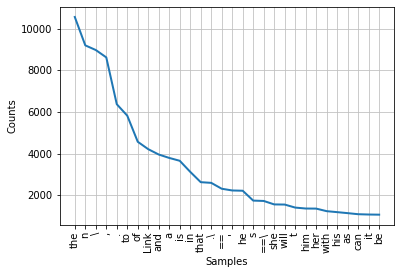

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [265]:
freq.plot(30, cumulative=False)

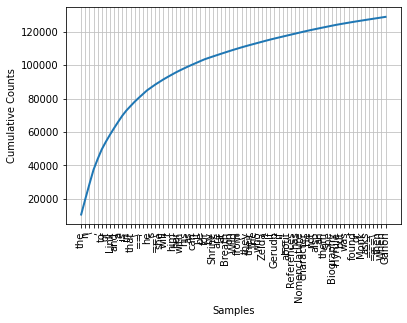

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [266]:
freq.plot(75, cumulative=True)

In [267]:
four_words = [w for w in zelda_text if len(w) == 4]

In [269]:
freq_four = nltk.FreqDist(four_words)

In [271]:
for w in freq_four:
  print(w)

Link
that
will
with
Wild
from
they
also
them
Monk
asks
===\
then
When
this
when
have
Town
into
They
says
Also
only
time
been
more
away
what
back
help
name
This
like
well
does
find
Zora
tell
hero
must
such
Impa
take
Time
once
over
body
give
Blue
down
nThe
some
Side
King
seen
able
near
Riju
than
much
game
make
Rito
even
come
Sand
used
many
Fire
were
drop
Wind
With
each
Yiga
City
Once
both
most
home
Four
long
head
just
role
same
Kara
Seal
stop
rest
Tree
know
left
Ruta
fire
sell
goes
stay
very
Paya
four
area
good
made
work
Clan
land
Deku
Mask
Hero
life
love
Helm
form
part
past
keep
meet
upon
girl
blue
Shop
Bomb
true
talk
Upon
lost
next
save
gets
seal
Like
Dark
Main
side
look
uses
Song
nIce
open
Lake
Rock
East
soon
shop
told
type
full
play
Past
Gear
show
Mine
high
best
wife
hear
said
Koko
last
need
====
cold
spot
turn
five
Tech
face
Pond
Ages
ever
dark
\".\
care
fall
stun
went
hand
free
fact
move
wind
Yuga
eyes
road
rock
room
Tali
runs
evil
boss
sent
West
ends
call
wild
live
tree
done
Guts


**What does the following code do? sum(len(w) for w in ZeldaWiki) Can you use it to work out the average token length of the ZeldaWiki Text?**

It will sum the length of all words in the corpus. We can use it to fond the average token length by diving iy by the total number of tokens:

In [272]:
sum(len(w) for w in zelda_text)/len(zelda_text)

3.838068849121769

In [273]:
def vocab_size(text):
  return len(set(text))


In [275]:
vocab_size(zelda_text)

11566

In [276]:
def percent(word, text):
  return 100 * text.count(word) / len(text)

In [277]:
percent("Link", zelda_text)

1.8330186955727423

## Part 3: Working with NLTK and other types of text

In [281]:
nltk.corpus.gutenberg

<PlaintextCorpusReader in '/Users/thefoolishpupil/nltk_data/corpora/gutenberg'>

In [282]:
from nltk.corpus import state_union

In [293]:
for text in state_union.fileids():
  count_men = state_union.words(text).count("men")
  count_women = state_union.words(text).count("women")
  count_people = state_union.words(text).count("people")
  print("count of men: \t\t {}".format(count_men))
  print("count of women: \t {}".format(count_women))
  print("count of people: \t {} \n".format(count_people))

count of men: 		 2
count of women: 	 2
count of people: 	 10 

count of men: 		 12
count of women: 	 7
count of people: 	 49 

count of men: 		 7
count of women: 	 2
count of people: 	 12 

count of men: 		 4
count of women: 	 1
count of people: 	 22 

count of men: 		 2
count of women: 	 1
count of people: 	 15 

count of men: 		 6
count of women: 	 2
count of people: 	 15 

count of men: 		 8
count of women: 	 2
count of people: 	 9 

count of men: 		 3
count of women: 	 0
count of people: 	 17 

count of men: 		 2
count of women: 	 0
count of people: 	 15 

count of men: 		 4
count of women: 	 0
count of people: 	 26 

count of men: 		 2
count of women: 	 2
count of people: 	 30 

count of men: 		 5
count of women: 	 2
count of people: 	 11 

count of men: 		 2
count of women: 	 1
count of people: 	 19 

count of men: 		 4
count of women: 	 1
count of people: 	 11 

count of men: 		 2
count of women: 	 0
count of people: 	 10 

count of men: 		 6
count of women: 	 0
count of people:

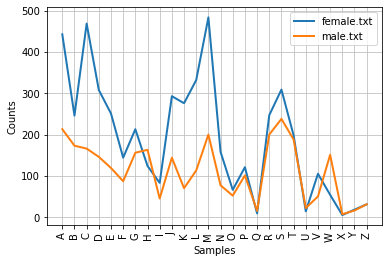

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [300]:
from nltk.corpus import names

cfd = nltk.ConditionalFreqDist(
  (fileid, name[0])
  for fileid in names.fileids()
  for name in names.words(fileid))

cfd.plot()

In [311]:
from nltk.corpus import brown
modals = ['can', 'could', 'may', 'might', 'must', 'will']

for genre in brown.categories():
  text = brown.words(categories=genre)
  fdist = nltk.FreqDist(w.lower() for w in text)
  print(genre + ":  ")
  for m in modals:
    print(m + ':', fdist[m], end=' ')
  print("\n")

adventure:  
can: 48 could: 154 may: 7 might: 59 must: 27 will: 51 

belles_lettres:  
can: 249 could: 216 may: 221 might: 113 must: 171 will: 246 

editorial:  
can: 124 could: 57 may: 79 might: 39 must: 55 will: 235 

fiction:  
can: 39 could: 168 may: 10 might: 44 must: 55 will: 56 

government:  
can: 119 could: 38 may: 179 might: 13 must: 102 will: 244 

hobbies:  
can: 276 could: 59 may: 143 might: 22 must: 84 will: 269 

humor:  
can: 17 could: 33 may: 8 might: 8 must: 9 will: 13 

learned:  
can: 367 could: 159 may: 336 might: 128 must: 203 will: 340 

lore:  
can: 170 could: 142 may: 170 might: 50 must: 96 will: 178 

mystery:  
can: 45 could: 145 may: 15 might: 57 must: 31 will: 25 

news:  
can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

religion:  
can: 84 could: 59 may: 79 might: 12 must: 54 will: 72 

reviews:  
can: 45 could: 40 may: 47 might: 26 must: 19 will: 61 

romance:  
can: 79 could: 195 may: 11 might: 51 must: 46 will: 49 

science_fiction:  
can: 16 co

It's interesting to look at the table of the modal word distribution accross genres; We can see that the science fiction genre has relatively low useage of modal verbs which makes a lot of sense since the notion of ability is less demanded in a scientific journal. It is also interesting seeing that the government genre has a relatively high usage of must and will, as these words would typically be used in promises or statements of action.

In [352]:
# 15
def words_occured_3_times(text):
  dist = nltk.FreqDist(text.words())
  return [k for k,v in dist.items() if v >= 3]

In [355]:
words_of_3 =  words_occured_3_times(brown)

In [374]:
# 16
df = pd.DataFrame(columns=['Genre','Tokens','Types','Lexical Diversity'])
df.set_index("Genre")
for genre in brown.categories():
  text = brown.words(categories=genre)
  tokens = len(text)
  types = len(set(text))
  diversity = lexical_diversity(text)
  df2 = pd.DataFrame([[genre, tokens, types, diversity]], columns=['Genre','Tokens','Types','Lexical Diversity'])
  df =pd.concat([df, df2])

df = df.set_index("Genre")

In [375]:
df

,Tokens,Types,Lexical Diversity
Genre,,,
adventure,69342,8874,0.127974
belles_lettres,173096,18421,0.106421
editorial,61604,9890,0.160542
fiction,68488,9302,0.135819
government,70117,8181,0.116676
hobbies,82345,11935,0.144939
humor,21695,5017,0.231251
learned,181888,16859,0.092689
lore,110299,14503,0.131488


the learned category has the lowest diversity. This could be explained by the nature of scientific journals; It's possible that there is a lot of repetition in the text. This is to be exapected.

In [385]:
# 17
from nltk.corpus import stopwords

def freq_non_stop_words(text):
  stopwords = nltk.corpus.stopwords.words('english')
  content = [w for w in zelda_text if w.lower() not in stopwords]
  freq = nltk.FreqDist(content)
  return list(freq)[:50]

In [445]:
# 18
stopwords = nltk.corpus.stopwords.words('english')
brown_text = brown.words()
brown_bigrams = list(nltk.bigrams(brown_text))
cleaned = [ x for x in brown_bigrams if x[0] not in stopwords and x[1] not in stopwords ]

brown_fdist = nltk.FreqDist(cleaned)


In [449]:
for x in list(brown_fdist)[:50]:
  print(x)

('.', 'The')
('.', '``')
("''", '.')
(';', ';')
('.', 'He')
('?', '?')
("''", ',')
('.', 'It')
('.', 'In')
('.', 'But')
('.', 'I')
(',', '``')
('.', 'This')
('.', 'A')
("''", '?')
('!', '!')
('.', 'They')
('.', 'She')
('.', 'There')
(',', 'I')
('.', 'And')
('.', 'If')
('``', 'I')
(':', '``')
('.', 'For')
('.', 'When')
('.', 'We')
('said', ',')
('.', 'As')
('.', 'His')
('said', '.')
(')', ',')
('United', 'States')
('?', '``')
(')', '.')
(',', 'however')
('.', 'At')
('.', 'One')
("''", '!')
('.', 'To')
('however', ',')
('.', 'These')
('.', 'Then')
('New', 'York')
('.', 'On')
('.', '(')
('``', 'The')
('.', 'That')
('.', 'You')
('.', 'With')


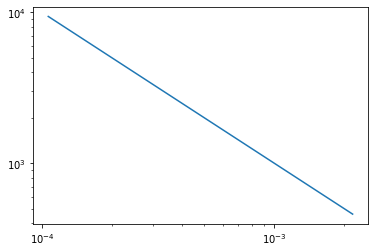

In [492]:
import pylab
def zipfs_law(text,n):
    text_fd=nltk.FreqDist(text)
    text_fd_common=text_fd.most_common(n)
    freqs=[y for x,y in text_fd_common]
    ranks=[1/freq for freq in freqs]
    pylab.xscale('log')
    pylab.yscale('log')
    pylab.plot(ranks,freqs)

zipfs_law(nltk.corpus.gutenberg.words('austen-sense.txt'),50)

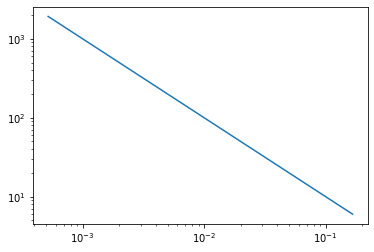

In [493]:
import random
random_text=''
for i in range(0,random.randrange(10000,1000000)):
    random_text+=random.choice("abcdefg ")
 
zipfs_law(random_text.split(' '),100)

https://web.archive.org/web/20210927004422/https://www.hpl.hp.com/research/idl/papers/ranking/adamicglottometrics.pdf

Berabasi-Albert - growth and preferential attachment